### Imports

In [1]:
from matplotlib import pyplot as plt
from data import load_data, load_narx_data
from matplotlib import pyplot as plt
import numpy as np
import torch
from data import load_narx_data
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, Matern, Product
from scipy.sparse import csr_matrix

In [2]:
n_a, n_b = 2, 2
Split = [0.6, 0.2, 0.2] # split; [training, validation, test]
total_number_of_points = 5000 # total number of points to consider from the larger dataset (starting from index 0)

In [3]:
Xtrain,Ytrain = load_narx_data(n_a, n_b, total_number_of_points, section="train", split=Split, as_tensor=True)
Xval,Yval = load_narx_data(n_a, n_b, total_number_of_points, section="validation", split=Split, as_tensor=True)
Xtest,Ytest = load_narx_data(n_a, n_b, total_number_of_points, section="test", split=Split, as_tensor=True)

Considering 5000 datapoints
Using 3000 datapoints for training set
Considering 5000 datapoints
Using 1000 datapoints for validation set
Considering 5000 datapoints
Using 1000 datapoints for test set


In [4]:
# Standard settings
kernel = RBF(length_scale=1) + WhiteKernel(noise_level=0.1)
reg = GaussianProcessRegressor(kernel, n_restarts_optimizer=5)

Create sparse matrices

In [5]:
XtrainSparse = csr_matrix(Xtrain)
YtrainSparse = csr_matrix(Ytrain)

In [6]:
Yval = Yval.numpy()  # Convert Yval from Tensor to NumPy array
Ytest = Ytest.numpy()  # Convert Ytest from Tensor to NumPy array

## Fit the GP

In [7]:
reg.fit(XtrainSparse.toarray(), YtrainSparse.toarray().transpose())

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=5)

In [8]:
Yval_pred, Yval_pred_std = reg.predict(Xval, return_std=True) 

NRMS = np.mean((Yval_pred-Yval)**2)**0.5/np.std(Yval)

print(f'Validation NRMS= {NRMS}')

Validation NRMS= 0.00859001248725966


In [9]:
reg.fit(Xtrain, Ytrain)

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=5)

In [10]:
Yval_pred, Yval_pred_std = reg.predict(Xval, return_std=True) 

NRMS = np.mean((Yval_pred-Yval)**2)**0.5/np.std(Yval)

print(f'Validation NRMS= {NRMS}')

Validation NRMS= 0.00859001250131177


In [11]:
reg.fit(XtrainSparse.toarray(), Ytrain)

GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=0.1),
                         n_restarts_optimizer=5)

In [12]:
Yval_pred, Yval_pred_std = reg.predict(Xval, return_std=True) 

NRMS = np.mean((Yval_pred-Yval)**2)**0.5/np.std(Yval)

print(f'Validation NRMS= {NRMS}')

Validation NRMS= 0.00859001249518509


In [15]:
print(reg.kernel_)

RBF(length_scale=4.1) + WhiteKernel(noise_level=2.14e-05)


Make some nice plots

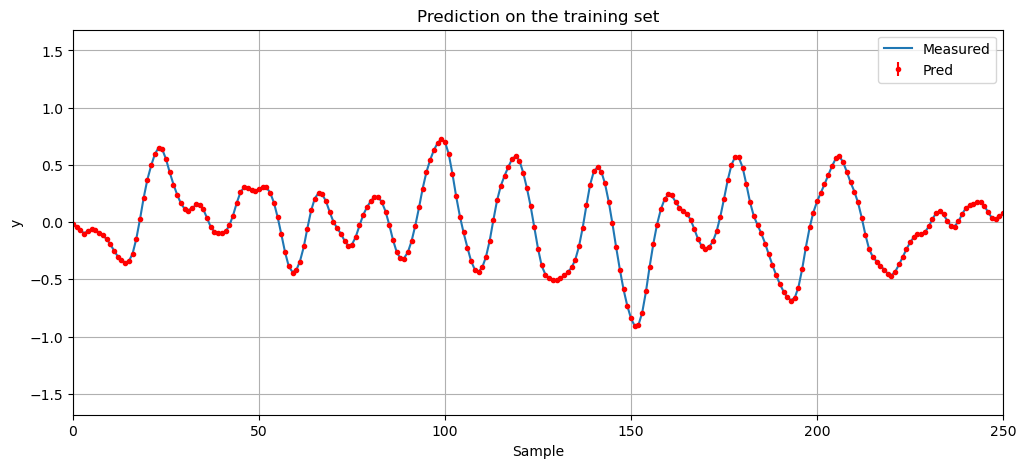

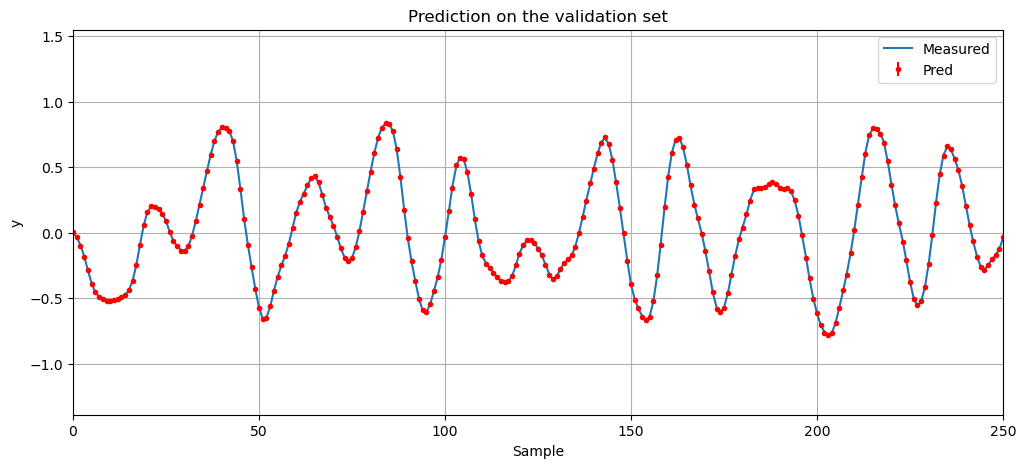

Validation NRMS= 0.00859001249518509


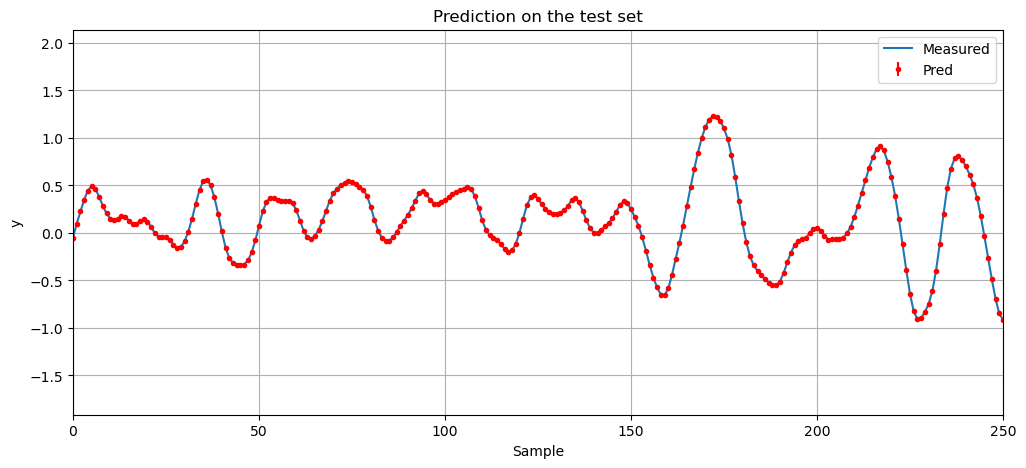

Test NRMS = 0.00894061603599241


In [14]:
# Plotting
Ytrain_pred, Ytrain_pred_std = reg.predict(Xtrain, return_std=True) 
plt.figure(figsize=(12, 5)) 
plt.plot(Ytrain) 
plt.title('Prediction on the training set')
plt.errorbar(np.arange(len(Xtrain)), Ytrain_pred, yerr=2 * Ytrain_pred_std, fmt='.r') 
plt.grid()
plt.xlabel('Sample')
plt.ylabel('y')
plt.legend(['Measured', 'Pred'])
plt.xlim([0, 250])
plt.show()

plt.figure(figsize=(12, 5)) 
plt.title('Prediction on the validation set')
plt.plot(Yval) 
Yval_pred, Yval_pred_std = reg.predict(Xval, return_std=True) 
plt.errorbar(np.arange(len(Xval)), Yval_pred, yerr=2 * Yval_pred_std, fmt='.r') 
plt.grid()
plt.xlabel('Sample')
plt.ylabel('y')
plt.legend(['Measured', 'Pred']) 
plt.xlim([0, 250])
plt.show()


print(f'Validation NRMS= {np.mean((Yval_pred-Yval)**2)**0.5/np.std(Yval)}')

plt.figure(figsize=(12, 5))
plt.title('Prediction on the test set')
plt.plot(Ytest)
ytest_pred, ytest_pred_std = reg.predict(Xtest, return_std=True)
plt.errorbar(np.arange(len(Xtest)), ytest_pred, yerr=2 * ytest_pred_std, fmt='.r')
plt.grid()
plt.xlabel('Sample')
plt.ylabel('y')
plt.legend(['Measured', 'Pred'])
plt.xlim([0, 250])
plt.show()

print(f'Test NRMS = {np.mean((ytest_pred - Ytest) ** 2, axis=0) ** 0.5 / np.std(Ytest)}')

# Results

Time calculation: <br>
1000 items takes 0.7 sec